In [1]:
import pandas as pd
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
from keras import layers
from sklearn import svm
from sklearn.model_selection import train_test_split , GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import precision_score,recall_score , classification_report,f1_score
import scipy.stats
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.linear_model import Lasso
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SelectFromModel
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from matplotlib import pyplot
import os
from sklearn import metrics
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from keras.wrappers.scikit_learn import KerasClassifier, KerasRegressor
import eli5
from eli5.sklearn import PermutationImportance
import shap



In [2]:
def results(CM):
    TN = CM[0][0]
    FN = CM[1][0]
    TP = CM[1][1]
    FP = CM[0][1]

    # Sensitivity, hit rate, recall, or true positive rate
    TPR = TP/(TP+FN)
    # Specificity or true negative rate
    TNR = TN/(TN+FP) 
    # Precision or positive predictive value
    PPV = TP/(TP+FP)
    # Negative predictive value
    NPV = TN/(TN+FN)
    # Fall out or false positive rate
    FPR = FP/(FP+TN)
    # False negative rate
    FNR = FN/(TP+FN)
    # False discovery rate
    FDR = FP/(TP+FP)
    # Overall accuracy
    ACC = (TP+TN)/(TP+FP+FN+TN)
    return('sensetivity: ' ,TPR , ' specifity: ' , TNR ,' PPV: ' ,PPV,' NPV: ', NPV)

In [3]:
data = pd.read_excel('Downloads/FinalCorneal.xlsx')
print(data.columns)
print(data.head())
data = data[data.columns[:-5]]

Index(['DonorTrephineSize', 'Eye', 'KeratoplastyInFellowEyeAtGraftRejection',
       'Age', 'Sex', 'VKC', 'type.of.transplant', 'SutureComplication',
       'StitchAbscess', 'LooseSuture', 'BrokenSuture', 'SutureVascularization',
       'SutureIn', 'OnSteroid', 'RecodedSecondaryIntervention',
       'GraftVascularization', 'VKCReactivation', 'GraftRejection',
       'SutureComplicationAssociatedWithRejection',
       'GraftVascularizationAssociateWithRejection',
       'SecondaryInterventionAssociatedWithRejection',
       'VKCReactivationAssociateWithGraftRejection',
       'GraftRejectionMoreThanOnce', 'FU', 'IntervalToFirstStutreRemoval',
       'IntervalToCompleteSutureRemoval', 'IntervalToStopSteroid',
       'TimeToFirstSutureRemoval', 'TimeToSecondRejection',
       'TimeToThirdRejection', 'TimeToFourthRejection', 'TimeToFifthRejection',
       'TimeToSixthRejection'],
      dtype='object')
   DonorTrephineSize  Eye  KeratoplastyInFellowEyeAtGraftRejection  Age  Sex  \
0        

In [5]:
data.columns

Index(['DonorTrephineSize', 'Eye', 'KeratoplastyInFellowEyeAtGraftRejection',
       'Age', 'Sex', 'VKC', 'type.of.transplant', 'SutureComplication',
       'StitchAbscess', 'LooseSuture', 'BrokenSuture', 'SutureVascularization',
       'SutureIn', 'OnSteroid', 'RecodedSecondaryIntervention',
       'GraftVascularization', 'VKCReactivation', 'GraftRejection',
       'SutureComplicationAssociatedWithRejection',
       'GraftVascularizationAssociateWithRejection',
       'SecondaryInterventionAssociatedWithRejection',
       'VKCReactivationAssociateWithGraftRejection',
       'GraftRejectionMoreThanOnce', 'FU', 'IntervalToFirstStutreRemoval',
       'IntervalToCompleteSutureRemoval', 'IntervalToStopSteroid',
       'TimeToFirstSutureRemoval'],
      dtype='object')

In [13]:
data[data['GraftRejection']==1]['Age'].mean()

28.77900552486188

In [167]:
data['TimeToFirstSutureRemoval'].isna().sum()

905

In [168]:
useless_columns = ['TimeToFirstSutureRemoval',"GraftRejection",'Eye','SutureComplication','IntervalToCompleteSutureRemoval','VKCReactivation','SutureIn','GraftRejectionMoreThanOnce','KeratoplastyInFellowEyeAtGraftRejection','SutureComplicationAssociatedWithRejection','GraftVascularizationAssociateWithRejection','SecondaryInterventionAssociatedWithRejection','VKCReactivationAssociateWithGraftRejection']
sample_useless_columns = ['Eye','SutureComplication','IntervalToCompleteSutureRemoval','VKCReactivation','SutureIn','GraftRejectionMoreThanOnce','KeratoplastyInFellowEyeAtGraftRejection','SutureComplicationAssociatedWithRejection','GraftVascularizationAssociateWithRejection','SecondaryInterventionAssociatedWithRejection','VKCReactivationAssociateWithGraftRejection']

In [169]:
X = data.drop(useless_columns, axis = 1)
y = data["GraftRejection"]

In [170]:
catagorical_data = ["Sex",'VKC',"type.of.transplant","StitchAbscess","LooseSuture","BrokenSuture","SutureVascularization","OnSteroid",'RecodedSecondaryIntervention','GraftVascularization']
X[catagorical_data] =X[catagorical_data]-1 

In [171]:
features = data.drop(useless_columns, axis = 1).columns

In [172]:
imp = IterativeImputer(max_iter=10, random_state=0)
X = imp.fit_transform(X)

In [173]:
standard = StandardScaler()
X = standard.fit_transform(X)

In [186]:
x_train , x_test , y_train, y_test = train_test_split(X,y , test_size = 0.2, random_state = 10)

In [187]:
X.shape

(1237, 15)

In [188]:
y_train = y_train - 1
y_test = y_test - 1

In [189]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(15,activation = 'relu',input_dim = 15),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(32,activation = 'relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(16,activation = 'relu'),
    tf.keras.layers.Dense(1,activation = 'sigmoid')
])
sgd = tf.keras.optimizers.SGD(learning_rate = 0.05 , decay =1e-6 , momentum = 0.8 , nesterov = True)
model.compile(loss = 'binary_crossentropy' , optimizer = sgd,metrics = tf.keras.metrics.AUC())


In [205]:
history = model.fit(x_train,y_train,validation_data = (x_test,y_test),epochs=1)

31/31 [==============================] - 0s 10ms/step - loss: 0.5153 - auc_9: 0.7259 - val_loss: 0.4294 - val_auc_9: 0.8143


In [206]:
pred_prob = model.predict(x_test)
pred = model.predict(x_test)
pred = (pred>=0.5)
print(results(metrics.confusion_matrix(y_test,pred)))
print(classification_report(y_test,pred))

('sensetivity: ', 0.27419354838709675, ' specifity: ', 0.989247311827957, ' PPV: ', 0.8947368421052632, ' NPV: ', 0.8034934497816594)
              precision    recall  f1-score   support

           0       0.80      0.99      0.89       186
           1       0.89      0.27      0.42        62

    accuracy                           0.81       248
   macro avg       0.85      0.63      0.65       248
weighted avg       0.83      0.81      0.77       248



In [195]:
svm = SVC()
svm.probability = True
svm.fit(x_train,y_train)
pred_prob_svm  = svm.predict_proba(x_test)
pred_svm = svm.predict(x_test)
np.set_printoptions()
print(results(metrics.confusion_matrix(y_test,pred_svm)))
print(classification_report(y_test,pred_svm))
pred_prob_svm = 1- pred_prob_svm.reshape(496 ,1)[::2]

('sensetivity: ', 0.3548387096774194, ' specifity: ', 0.9516129032258065, ' PPV: ', 0.7096774193548387, ' NPV: ', 0.815668202764977)
              precision    recall  f1-score   support

           0       0.82      0.95      0.88       186
           1       0.71      0.35      0.47        62

    accuracy                           0.80       248
   macro avg       0.76      0.65      0.68       248
weighted avg       0.79      0.80      0.78       248



In [196]:
rf = RandomForestClassifier(oob_score = True , criterion = 'gini',max_depth=13)
rf.fit(x_train,y_train)
rf_pred_prob = rf.predict_proba(x_test)
rf_pred = rf.predict(x_test)
rf_pred_prob = 1- rf_pred_prob.reshape(496 ,1)[::2]
print(results(metrics.confusion_matrix(y_test,rf_pred)))
print(classification_report(y_test,rf_pred))

('sensetivity: ', 0.4032258064516129, ' specifity: ', 0.9516129032258065, ' PPV: ', 0.7352941176470589, ' NPV: ', 0.8271028037383178)
              precision    recall  f1-score   support

           0       0.83      0.95      0.89       186
           1       0.74      0.40      0.52        62

    accuracy                           0.81       248
   macro avg       0.78      0.68      0.70       248
weighted avg       0.80      0.81      0.79       248



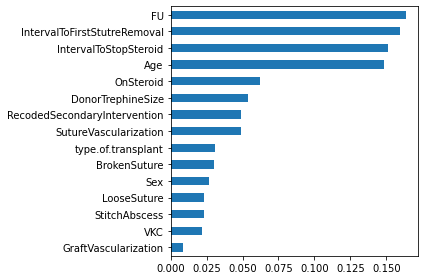

In [197]:
importances = rf.feature_importances_
forest_importances = pd.Series(importances,index = features)
forest_importances= forest_importances.sort_values()
fig,ax = plt.subplots()
forest_importances.plot.barh(ax=ax)
fig.tight_layout()

In [198]:
gbc = GradientBoostingClassifier(loss = 'deviance',n_estimators = 400 , learning_rate = 0.01 ,criterion='mse',max_depth =6)
gbc.fit(x_train,y_train)
gbc_pred_prob = gbc.predict_proba(x_test)
gbc_pred = gbc.predict(x_test)
gbc_pred_prob = 1- gbc_pred_prob.reshape(496 ,1)[::2]
print(results(metrics.confusion_matrix(y_test,gbc_pred)))
print(classification_report(y_test,gbc_pred))

('sensetivity: ', 0.43548387096774194, ' specifity: ', 0.9408602150537635, ' PPV: ', 0.7105263157894737, ' NPV: ', 0.8333333333333334)
              precision    recall  f1-score   support

           0       0.83      0.94      0.88       186
           1       0.71      0.44      0.54        62

    accuracy                           0.81       248
   macro avg       0.77      0.69      0.71       248
weighted avg       0.80      0.81      0.80       248



In [199]:
lr = LogisticRegression(penalty = 'l2' , tol =1e-5)
lr.fit(x_train,y_train)
lr_pred_prob = lr.predict_proba(x_test)
lr_pred = lr.predict(x_test)
print(results(metrics.confusion_matrix(y_test,lr_pred)))
lr_pred_prob = 1- lr_pred_prob.reshape(496 ,1)[::2]
print(classification_report(y_test,lr_pred))

('sensetivity: ', 0.41935483870967744, ' specifity: ', 0.9516129032258065, ' PPV: ', 0.7428571428571429, ' NPV: ', 0.8309859154929577)
              precision    recall  f1-score   support

           0       0.83      0.95      0.89       186
           1       0.74      0.42      0.54        62

    accuracy                           0.82       248
   macro avg       0.79      0.69      0.71       248
weighted avg       0.81      0.82      0.80       248



In [200]:
knn = KNeighborsClassifier(n_neighbors=4)
knn.fit(x_train,y_train)
knn_pred_prob = knn.predict_proba(x_test)
knn_pred = knn.predict(x_test)
knn_pred_prob = 1- knn_pred_prob.reshape(496 ,1)[::2]
print(results(metrics.confusion_matrix(y_test,knn_pred)))
print(classification_report(y_test,knn_pred))

('sensetivity: ', 0.45161290322580644, ' specifity: ', 0.9139784946236559, ' PPV: ', 0.6363636363636364, ' NPV: ', 0.8333333333333334)
              precision    recall  f1-score   support

           0       0.83      0.91      0.87       186
           1       0.64      0.45      0.53        62

    accuracy                           0.80       248
   macro avg       0.73      0.68      0.70       248
weighted avg       0.78      0.80      0.79       248



DNN Model: 0.8144294138050641
SVM Model 0.7321366631980576
Random Forest Model: 0.7598855359001039
Gradient Boosted Dicision Tree Model: 0.749219562955255
K Nearest Neighbot Model: 0.7022199098161637
Logistic regression Model: 0.8080992022199098


savefig() got unexpected keyword argument "papertype" which is no longer supported as of 3.3 and will become an error two minor releases later
savefig() got unexpected keyword argument "frameon" which is no longer supported as of 3.3 and will become an error two minor releases later


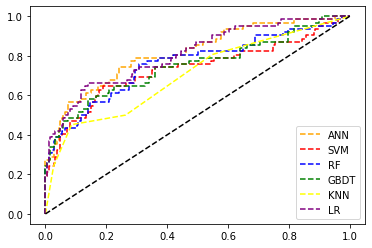

In [208]:
fpr8, tpr8, thresh8 = roc_curve(y_test, pred_prob, pos_label=1)
fpr9, tpr9, thresh9 = roc_curve(y_test, pred_prob_svm, pos_label=1)
fpr10, tpr10, thresh10 = roc_curve(y_test, rf_pred_prob, pos_label=1)
fpr11, tpr11, thresh11 = roc_curve(y_test, gbc_pred_prob, pos_label=1)
fpr12, tpr12, thresh12 = roc_curve(y_test, knn_pred_prob, pos_label=1)
fpr13, tpr13, thresh13 = roc_curve(y_test, lr_pred_prob, pos_label=1)

auc_score8 = roc_auc_score(y_test, pred_prob)
auc_score9 = roc_auc_score(y_test, pred_prob_svm)
auc_score10 = roc_auc_score(y_test, rf_pred_prob)
auc_score11 = roc_auc_score(y_test, gbc_pred_prob)
auc_score12 = roc_auc_score(y_test, knn_pred_prob)
auc_score13 = roc_auc_score(y_test, lr_pred_prob)

print("DNN Model:",auc_score8)
print("SVM Model",auc_score9)
print("Random Forest Model:",auc_score10)
print("Gradient Boosted Dicision Tree Model:",auc_score11)
print("K Nearest Neighbot Model:",auc_score12)
print("Logistic regression Model:",auc_score13)

random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)
plt.plot(fpr8, tpr8, linestyle='--',color='orange', label='ANN')
plt.plot(fpr9, tpr9, linestyle='--',color='red', label='SVM')
plt.plot(fpr10, tpr10, linestyle='--',color='blue', label='RF')
plt.plot(fpr11, tpr11, linestyle='--',color='green', label='GBDT')
plt.plot(fpr12, tpr12, linestyle='--',color='yellow', label='KNN')
plt.plot(fpr13, tpr13, linestyle='--',color='purple', label='LR')

plt.plot(p_fpr, p_tpr, linestyle='--', color='black')
plt.legend(loc="lower right")
plt.savefig('Downloads/corneal_transplant_result_ROC.pdf', dpi=None, 
                          facecolor='w',                                                
                          edgecolor='w',
                          orientation='portrait', 
                          papertype=None,                                  
                          format=None,                                
                          transparent=False,     
                          bbox_inches=None,                
                          pad_inches=0.1,                         
                          frameon=None,               
                          metadata=None)

In [ ]:

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 15)                240       
_________________________________________________________________
dropout_2 (Dropout)          (None, 15)                0         
_________________________________________________________________
dense_5 (Dense)              (None, 32)                512       
_________________________________________________________________
dropout_3 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_6 (Dense)              (None, 16)                528       
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 17        
Total params: 1,297
Trainable params: 1,297
Non-trainable params: 0
____________________________________________________